# The Health Company Diet

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt

# Loading the dataset CSV file

In [2]:
df=pd.read_csv('diet.csv')

# Checking the top 5 records

In [3]:
df.head()

,gender,Diet,pre.weight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3


# Checking the shape and information of the dataframe

In [4]:
df.shape

(78, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        78 non-null     object 
 1   Diet          78 non-null     object 
 2   pre.weight    78 non-null     int64  
 3   weight6weeks  78 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ KB


# Checking the summary of the dataframe

In [6]:
df.describe()

,pre.weight,weight6weeks
count,78.000000,78.000000
mean,72.525641,68.680769
std,8.723344,8.924504
min,58.000000,53.000000
25%,66.000000,61.850000
50%,72.000000,68.950000
75%,78.000000,73.825000
max,103.000000,103.000000


# Checking for missing values

In [7]:
df.isnull().sum()

gender          0
Diet            0
pre.weight      0
weight6weeks    0
dtype: int64

# Checking distinct values of Diet

In [8]:
df.Diet.value_counts()

B    27
C    27
A    24
Name: Diet, dtype: int64

In [9]:
df.gender.value_counts()

F    43
M    35
Name: gender, dtype: int64

# Creating box plots

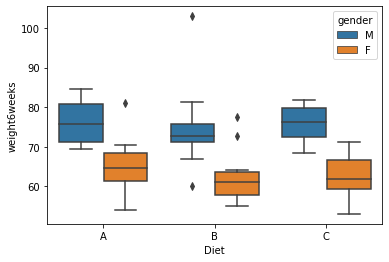

In [10]:
sns.boxplot(x="Diet", y="weight6weeks", data=df,hue='gender', order = ['A', 'B', 'C'])
plt.show()

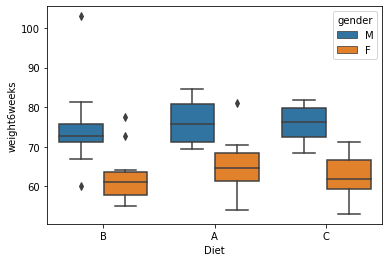

In [11]:
sns.boxplot(x="Diet", y="weight6weeks", data=df,hue='gender')
plt.show()

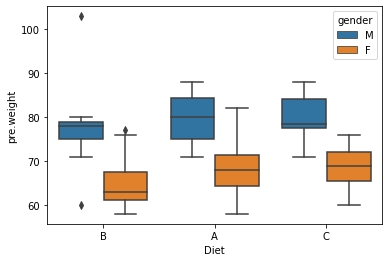

In [12]:
sns.boxplot(x="Diet", y="pre.weight", data=df,hue='gender')
plt.show()

# Formulate the hypothesis of the One-way ANOVA of 'gender' variable with the 'weight6weeks' variable.

$H_0$ : The means of 'weight6weeks' variable with respect to each gender is equal.

$H_1$ : At least one of the means of 'weight6weeks' variable with respect to each gender is unequal.

# One-way ANOVA with the 'gender' variable.

In [13]:
formula = 'weight6weeks ~ C(gender)'# y = f(x)
model = ols(formula, df).fit()
aov_table = anova_lm(model) # anova_lm(ols('weight6weeks ~ C(gender)', df).fit())
print(aov_table)

             df       sum_sq      mean_sq          F        PR(>F)
C(gender)   1.0  2854.201553  2854.201553  66.162186  6.097209e-12
Residual   76.0  3278.599601    43.139468        NaN           NaN


In [14]:
#aov_table = anova_lm(ols('weight6weeks ~ C(gender)', df).fit())

Since the p value in this scenario is less than $\alpha$ (0.05), we can say that we reject the Null Hypothesis ($H_0$).

# Formulate the hypothesis of the One-way ANOVA of 'Diet' variable with the 'weight6weeks' variable.

$H_0$ : The means of 'weight6weeks' variable with respect to each diet category is equal.

$H_1$ : At least one of the means of 'weight6weeks' variable with respect to each diet category is unequal.

# One-way ANOVA with the 'Diet' variable.

In [15]:
formula = 'weight6weeks ~ C(Diet)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df       sum_sq    mean_sq         F    PR(>F)
C(Diet)    2.0    29.841339  14.920670  0.183362  0.832839
Residual  75.0  6102.959815  81.372798       NaN       NaN


Since the p value in this scenario is greater than $\alpha$ (0.05), we can say that we fail to reject the Null Hypothesis ($H_0$).

# Formulate the hypothesis of ANOVA with both 'gender' and 'Diet' variables with respect to the variable 'weight6weeks'.

$H_0$ : The means of 'weight6weeks' variable with respect to each diet category and gender is equal.

$H_1$ : At least one of the means of 'weight6weeks' variable with respect to each diet category and gender is unequal.

# ANOVA with both 'gender' and 'Diet' variables with respect to the variable 'weight6weeks'.

In [16]:
formula = 'weight6weeks ~ C(gender) + C(Diet)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df       sum_sq      mean_sq          F        PR(>F)
C(gender)   1.0  2854.201553  2854.201553  65.765339  8.037802e-12
C(Diet)     2.0    67.015520    33.507760   0.772072  4.657403e-01
Residual   74.0  3211.584082    43.399785        NaN           NaN


Since the p value in both of the above scenarios are less than $\alpha$ (0.05), we can say that we reject the null hypothesis ($H_0$).

# Plot the interaction plot between the two variables and comment on the extent of interaction between the two categorical variables. 

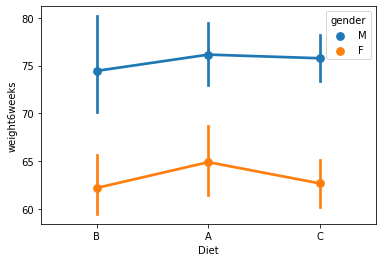

In [17]:
sns.pointplot(x = 'Diet', y = 'weight6weeks', hue='gender',data=df)
plt.show()

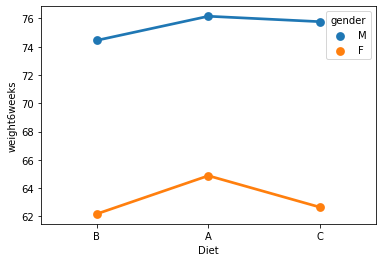

In [18]:
sns.pointplot(x = 'Diet', y = 'weight6weeks', hue='gender',data=df,ci= None)
plt.show()

As seen from the above two interaction plots, there seems to be very less interaction amongst the two categorical variables.

In [19]:
#Interaction Effect:
model=ols('weight6weeks~C(gender)+C(Diet)+C(gender):C(Diet)',data=df).fit()
aov_table=anova_lm(model)
print(aov_table)

                     df       sum_sq      mean_sq          F        PR(>F)
C(gender)           1.0  2854.201553  2854.201553  64.198902  1.453627e-11
C(Diet)             2.0    67.015520    33.507760   0.753682  4.743066e-01
C(gender):C(Diet)   2.0    10.555631     5.277816   0.118713  8.882364e-01
Residual           72.0  3201.028451    44.458728        NaN           NaN


In [20]:
#Interaction Effect:
model=ols('weight6weeks~C(Diet)+C(gender)+C(Diet):C(gender)',data=df).fit()
aov_table=anova_lm(model)
print(aov_table)

                     df       sum_sq      mean_sq          F        PR(>F)
C(Diet)             2.0    29.841339    14.920670   0.335607  7.160162e-01
C(gender)           1.0  2891.375733  2891.375733  65.035052  1.162414e-11
C(Diet):C(gender)   2.0    10.555631     5.277816   0.118713  8.882364e-01
Residual           72.0  3201.028451    44.458728        NaN           NaN


Since the p value in three of the above scenarios are less than $\alpha$ (0.05), we can say that we reject the null hypothesis ($H_0$).

In [21]:
model=ols('weight6weeks~C(gender)+C(Diet)+C(gender):C(Diet)+(pre.weight)',data=df).fit()
aov_table=anova_lm(model)
print(aov_table)

PatsyError: Error evaluating factor: NameError: name 'pre' is not defined
    weight6weeks~C(gender)+C(Diet)+C(gender):C(Diet)+(pre.weight)
                                                     ^^^^^^^^^^^^

In [22]:
df.columns = ['gender', 'Diet', 'pre_weight', 'weight6weeks']

In [23]:
df.head()

,gender,Diet,pre_weight,weight6weeks
0,M,B,60,60.0
1,M,B,103,103.0
2,F,A,58,54.2
3,F,A,60,54.0
4,F,A,64,63.3


In [24]:
model=ols('weight6weeks~ pre_weight+C(gender)+C(Diet)+C(gender):C(Diet)',data=df).fit()
aov_table=anova_lm(model, type = 2)
print(aov_table)

                     df       sum_sq      mean_sq           F        PR(>F)
C(gender)           1.0  2854.201553  2854.201553  501.808855  6.501384e-34
C(Diet)             2.0    67.015520    33.507760    5.891136  4.294332e-03
C(gender):C(Diet)   2.0    10.555631     5.277816    0.927914  4.001185e-01
pre_weight          1.0  2797.192790  2797.192790  491.785911  1.218141e-33
Residual           71.0   403.835660     5.687826         NaN           NaN
